# Dates

In [1]:
library('tidyverse')
library('lubridate')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
date = '2021-05-04'

In [3]:
ymd(date)

[1] "2021-05-04"

In [5]:
df = tribble(
    ~colA, ~colB,
    '2021-01-01', 1,
    '2022-01-01', 2,
    '2023-01-01', 3,
)

df

colA,colB
<chr>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


In [6]:
df |> mutate(colA = ymd(colA))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


In [7]:
df |> mutate(colA = parse_date(colA, format = '%Y-%m-%d'))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


# Reading in dates

In [12]:
bird_feeder_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
                           col_types = cols(Year = col_date('%Y')))

bird_feeder_data |>
    select(Year, Month, Day, species_code, how_many) |>
    head()

Year,Month,Day,species_code,how_many
<date>,<dbl>,<dbl>,<chr>,<dbl>
2021-01-01,3,4,amegfi,20
2020-01-01,12,19,moudov,11
2021-01-01,2,13,tuftit,2
2021-01-01,1,13,houspa,2
2021-01-01,1,11,balori,10
2021-01-01,3,13,norcar,2


In [13]:
bird_feeder_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
                           col_types = cols()) |>
    select(Year, Month, Day, species_code, how_many) |>
    mutate(date = make_date(Year, Month, Day))

bird_feeder_data |> head()

Year,Month,Day,species_code,how_many,date
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>
2021,3,4,amegfi,20,2021-03-04
2020,12,19,moudov,11,2020-12-19
2021,2,13,tuftit,2,2021-02-13
2021,1,13,houspa,2,2021-01-13
2021,1,11,balori,10,2021-01-11
2021,3,13,norcar,2,2021-03-13


In [35]:
species_code_count = bird_feeder_data |>
    count(species_code, wt = how_many) |>
    arrange(desc(n)) |>
    mutate(species_code = fct_inorder(species_code) |> fct_rev())

species_code_count |> head()

species_code,n
<fct>,<dbl>
daejun,31103
houspa,28491
moudov,26436
amegfi,23971
houfin,23130
norcar,18419


In [36]:
top10_birds = species_code_count |>
    slice_max(order_by = n, n = 10) # |>
    # pull(species_code)

top10_birds

species_code,n
<fct>,<dbl>
daejun,31103
houspa,28491
moudov,26436
amegfi,23971
houfin,23130
norcar,18419
eursta,16630
bkcchi,15614
pinsis,15029


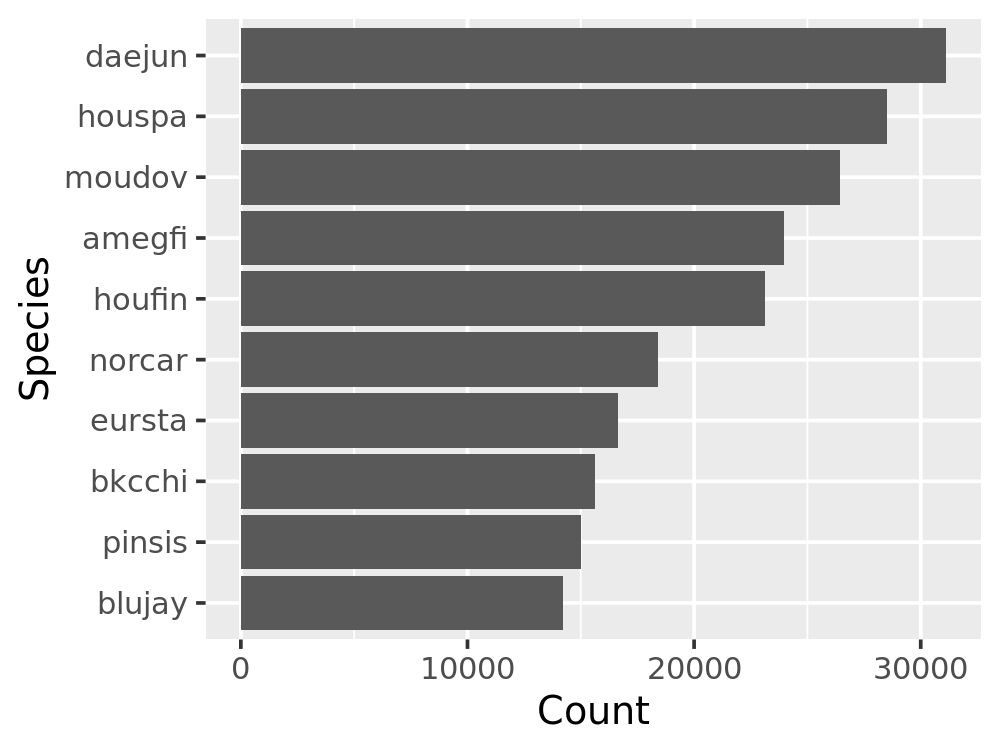

In [37]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(top10_birds, aes(y = species_code, x = n)) +
    geom_col() +
    xlab('Count') +
    ylab('Species')

p

In [48]:
top_bird = bird_feeder_data |>
    filter(species_code == 'daejun') |>
    group_by(date, species_code) |>
    summarize(how_many = sum(how_many), .groups = 'drop')

top_bird |> head()

date,species_code,how_many
<date>,<chr>,<dbl>
2020-11-14,daejun,531
2020-11-15,daejun,141
2020-11-16,daejun,121
2020-11-17,daejun,157
2020-11-18,daejun,70
2020-11-19,daejun,26


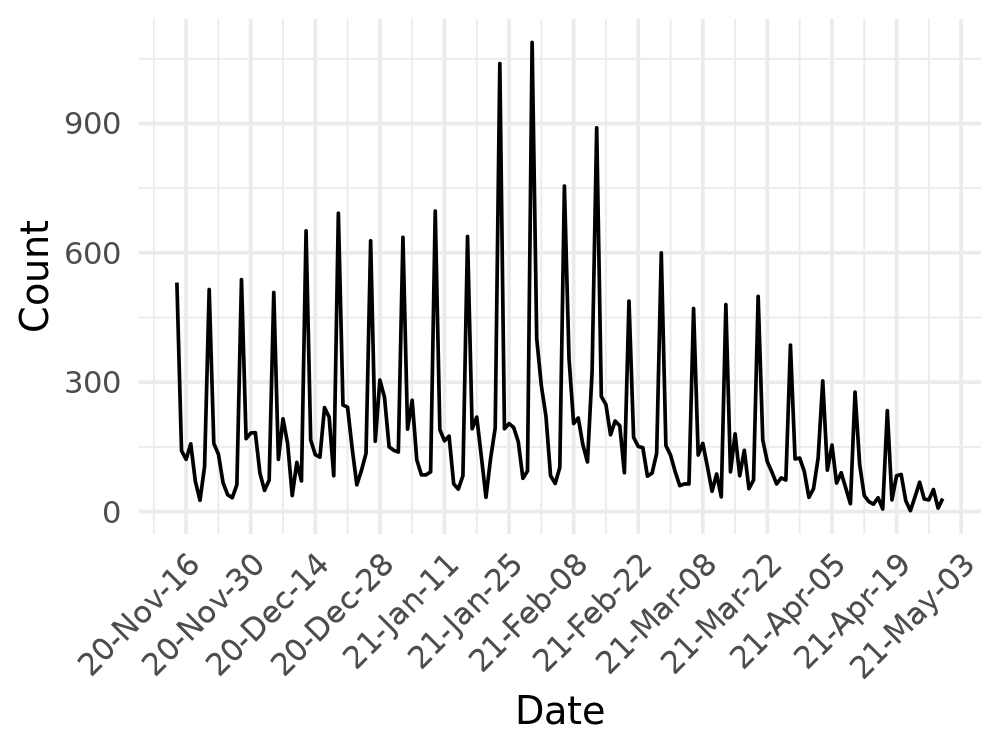

In [64]:
p2 = ggplot(top_bird, aes(y = how_many, x = date)) +
    geom_line() +
    scale_x_date(date_breaks = '2 weeks', date_labels = '%y-%b-%d') +
    ylab('Count') +
    xlab('Date') +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p2